In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics



def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


%  matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
from ucimlrepo import fetch_ucirepo

adult= fetch_ucirepo(name='Adult')
adult = pd.DataFrame(data= adult.data.original)

In [4]:
adult = adult[~adult['occupation'].isnull() ]
adult  = adult[ ~adult['workclass'].isnull()]
adult = adult[~adult['native-country'].isnull()]

In [5]:
# Setting all the categorical columns to type category
for col in set(adult.columns) - set(adult.describe().columns):
    adult[col] = adult[col].astype('category')
    
printmd('## 1.1. Columns and their types')
print(adult.info())

## 1.1. Columns and their types

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             47621 non-null  int64   
 1   workclass       47621 non-null  category
 2   fnlwgt          47621 non-null  int64   
 3   education       47621 non-null  category
 4   education-num   47621 non-null  int64   
 5   marital-status  47621 non-null  category
 6   occupation      47621 non-null  category
 7   relationship    47621 non-null  category
 8   race            47621 non-null  category
 9   sex             47621 non-null  category
 10  capital-gain    47621 non-null  int64   
 11  capital-loss    47621 non-null  int64   
 12  hours-per-week  47621 non-null  int64   
 13  native-country  47621 non-null  category
 14  income          47621 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB
None


In [6]:
# Top 5 records
printmd('## 1.2. Data')
adult.head()

## 1.2. Data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
printmd('## 1.3. Summary Statistics')

adult.describe()

## 1.3. Summary Statistics

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
printmd('## 1.4. Missing values')
for i,j in zip(adult.columns,(adult.values.astype(str) == '?').sum(axis = 0)):
    if j > 0:
        printmd(str(i) + ': ' + str(j) + ' records')

## 1.4. Missing values

workclass: 1836 records

occupation: 1843 records

native-country: 583 records

In [9]:
# Create one hot encoding of the categorical columns in the data frame.
def oneHotCatVars(df, df_cols):
    
    df_1 = adult_data = df.drop(columns = df_cols, axis = 1)
    df_2 = pd.get_dummies(df[df_cols])
    
    return (pd.concat([df_1, df_2], axis=1, join='inner'))

In [10]:
printmd('### 1.4.1. Filling in missing values for Attribute workclass')

test_data = adult[(adult.workclass.values == '?')].copy()
test_label = test_data.workclass

train_data = adult[(adult.workclass.values != '?')].copy()
train_label = train_data.workclass

test_data.drop(columns = ['workclass'], inplace = True)
train_data.drop(columns = ['workclass'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)

majority_class = adult.workclass.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.workclass.values == '?'),'workclass'] = overall_pred.values
print(adult.workclass.value_counts())
print(adult.workclass.unique())

### 1.4.1. Filling in missing values for Attribute workclass

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


workclass
Private             34966
Self-emp-not-inc     3847
Local-gov            3130
State-gov            1965
Self-emp-inc         1688
Federal-gov          1425
Never-worked          579
Without-pay            21
?                       0
Name: count, dtype: int64
['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay']
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ..., 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']


In [11]:
printmd('### 1.4.2. Filling in missing values for Occupation occupation')

test_data = adult[(adult.occupation.values == '?')].copy()
test_label = test_data.occupation

train_data = adult[(adult.occupation.values != '?')].copy()
train_label = train_data.occupation

test_data.drop(columns = ['occupation'], inplace = True)
train_data.drop(columns = ['occupation'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = adult.occupation.value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult.occupation.values == '?'),'occupation'] = overall_pred.values
print(adult.occupation.value_counts())
print(adult.occupation.unique())

### 1.4.2. Filling in missing values for Occupation occupation

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


occupation
Prof-specialty       7140
Craft-repair         6393
Exec-managerial      6102
Adm-clerical         5772
Sales                5530
Other-service        5019
Machine-op-inspct    3042
Transport-moving     2365
Handlers-cleaners    2079
Farming-fishing      1500
Tech-support         1443
Protective-serv       982
Priv-house-serv       240
Armed-Forces           14
?                       0
Name: count, dtype: int64
['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', ..., 'Machine-op-inspct', 'Tech-support', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
Length: 14
Categories (15, object): ['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', ..., 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']


In [12]:
printmd('### 1.4.3. Filling in missing values for Native Country')

test_data = adult[(adult['native-country'].values == '?')].copy()
test_label = test_data['native-country']

train_data = adult[(adult['native-country'].values != '?')].copy()
train_label = train_data['native-country']

test_data.drop(columns = ['native-country'], inplace = True)
train_data.drop(columns = ['native-country'], inplace = True)

train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)

log_reg = LogisticRegression()
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf_pred = clf.predict(test_data)

r_forest = RandomForestClassifier(n_estimators=10)
r_forest.fit(train_data, train_label)
r_forest_pred = r_forest.predict(test_data)


majority_class = adult['native-country'].value_counts().index[0]

pred_df =  pd.DataFrame({'RFor': r_forest_pred, 'DTree' : clf_pred, 'LogReg' : log_reg_pred})
overall_pred = pred_df.apply(lambda x: x.value_counts().index[0] if x.value_counts()[0] > 1 else majority_class, axis = 1)

adult.loc[(adult['native-country'].values == '?'),'native-country'] = overall_pred.values
print(adult['native-country'].value_counts())
print(adult['native-country'].unique())

### 1.4.3. Filling in missing values for Native Country

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


native-country
United-States                 43511
Mexico                          942
Philippines                     301
Germany                         202
Puerto-Rico                     180
Canada                          177
El-Salvador                     153
India                           148
Cuba                            136
China                           124
England                         123
South                           114
Italy                           105
Jamaica                         104
Dominican-Republic              100
Japan                            94
Guatemala                        87
Vietnam                          87
Columbia                         85
Poland                           85
Haiti                            71
Taiwan                           66
Portugal                         65
Iran                             57
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [13]:
# Resetting the categories

adult['workclass'] = adult['workclass'].cat.remove_categories('?')
adult['occupation'] = adult['occupation'].cat.remove_categories('?')
adult['native-country'] = adult['native-country'].cat.remove_categories('?')


In [14]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [15]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
import seaborn as sns

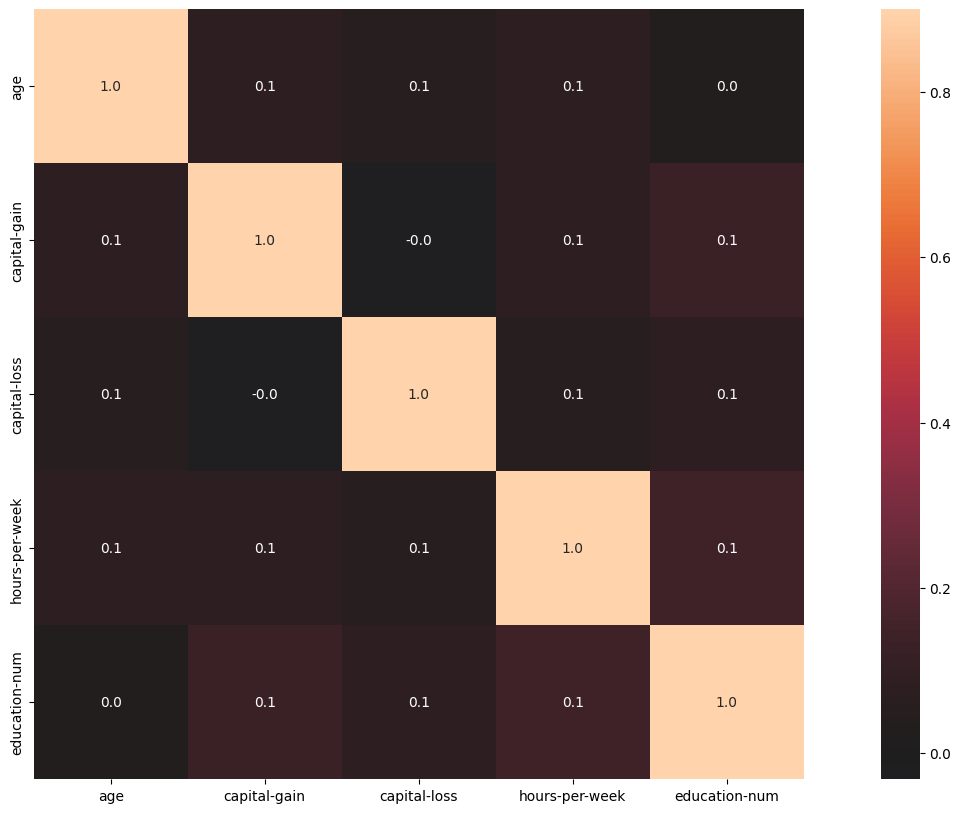

In [18]:
plt.subplots(figsize=(20, 10))
sns.heatmap( adult[['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']].corr() , vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()

In [19]:
adult.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [24]:
adult = adult[~adult['occupation'].isnull() ]
adult = adult[ ~adult['workclass'].isnull()]
adult  = adult[~adult['native-country'].isnull()]

In [42]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [38]:
adult['education']

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48836    Bachelors
48837    Bachelors
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 47621, dtype: category
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

In [43]:
for i in adult[['education']].drop_duplicates().itertuples(index=False):
    for j in i:
        print(j)


Bachelors
HS-grad
11th
Masters
9th
Some-college
Assoc-acdm
Assoc-voc
7th-8th
Doctorate
Prof-school
5th-6th
10th
1st-4th
Preschool
12th


In [40]:
# Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in adult[['education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

ValueError: not enough values to unpack (expected 2, got 1)

In [27]:
adult['educational']

KeyError: 'educational'

In [25]:
for x,y in adult[['educational']]:
    print(x,y)

KeyError: "None of [Index(['educational'], dtype='object')] are in the [columns]"

In [46]:
adult.loc[adult['income'] == '<=50K.', 'income'] = '<=50K'
adult.loc[adult['income'] == '>50K.', 'income'] = '>50K'

Text(0, 0.5, 'Proportion of population')

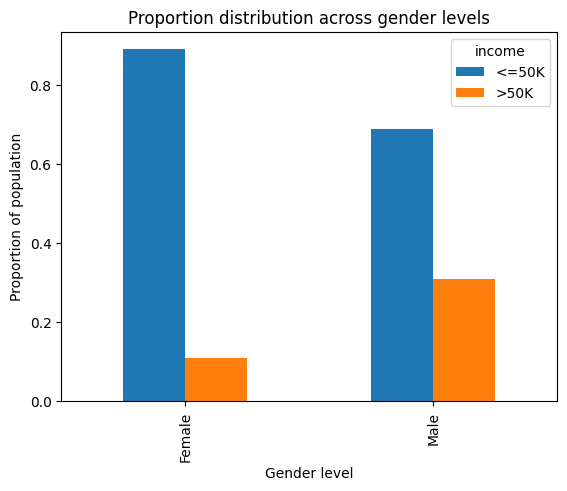

In [47]:
gender = round(pd.crosstab(adult.sex, adult.income).div(pd.crosstab(adult.sex, adult.income).apply(sum,1),0),2)
gender.sort_values(by = '>50K', inplace = True)
ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

Text(24.00000000000002, 0.5, 'Proportion of population')

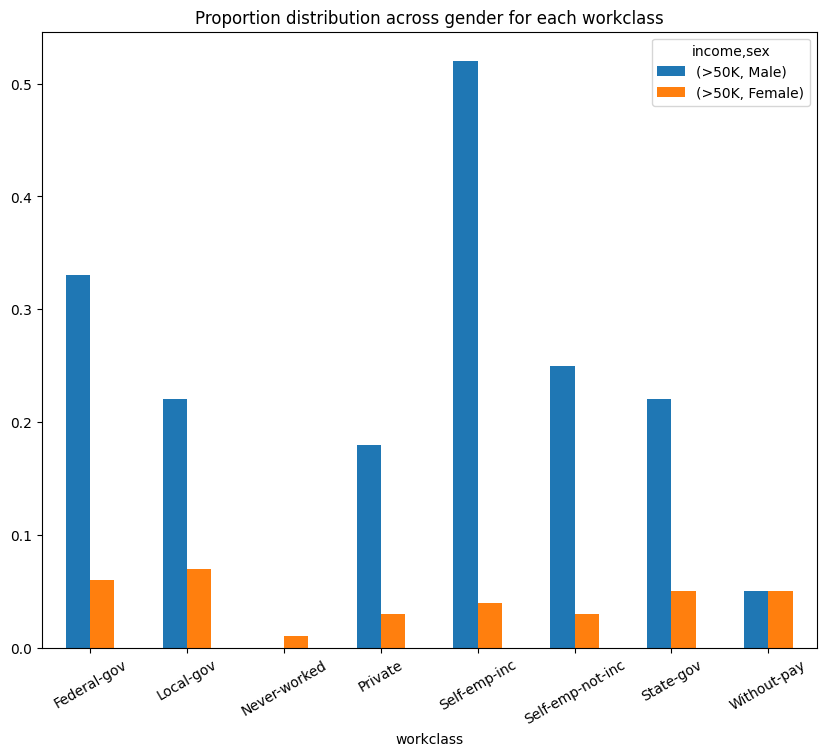

In [58]:
gender_workclass = round(pd.crosstab(adult.workclass, [adult.income, adult.sex]).div(pd.crosstab(adult.workclass, [adult.income, adult.sex]).apply(sum,1),0),2)
gender_workclass[[('>50K','Male'), ('>50K','Female')]].plot(kind = 'bar', title = 'Proportion distribution across gender for each workclass', figsize = (10,8), rot = 30)
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

## 2.3. Occupation vs Income

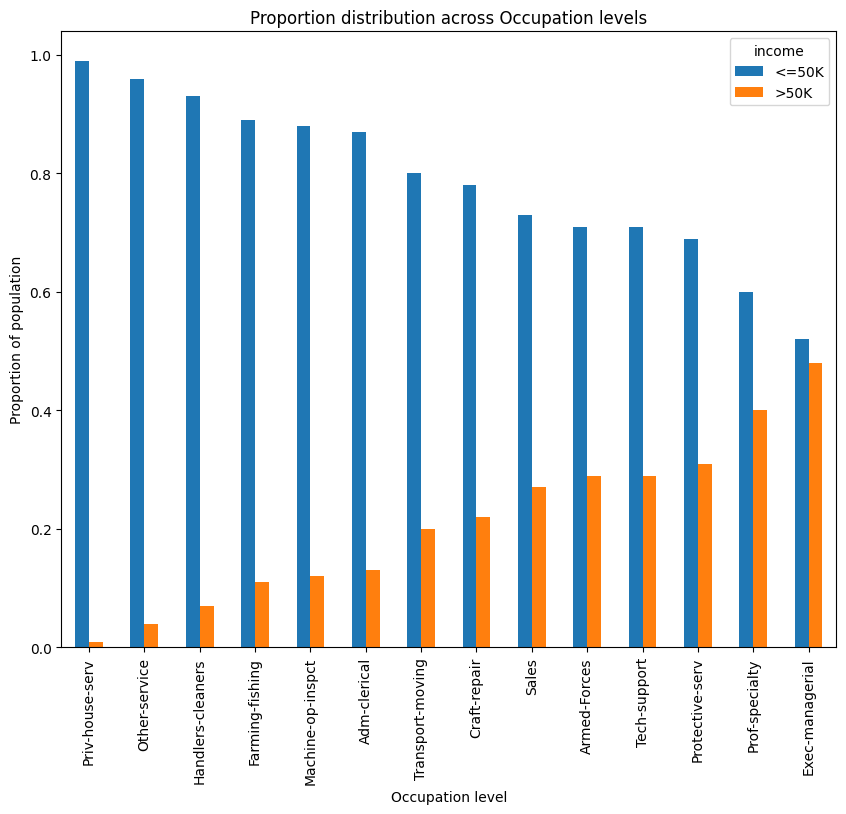

In [59]:
printmd('## 2.3. Occupation vs Income')

occupation = round(pd.crosstab(adult.occupation, adult.income).div(pd.crosstab(adult.occupation, adult.income).apply(sum,1),0),2)
occupation.sort_values(by = '>50K', inplace = True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

## 2.4. Workclass vs Income

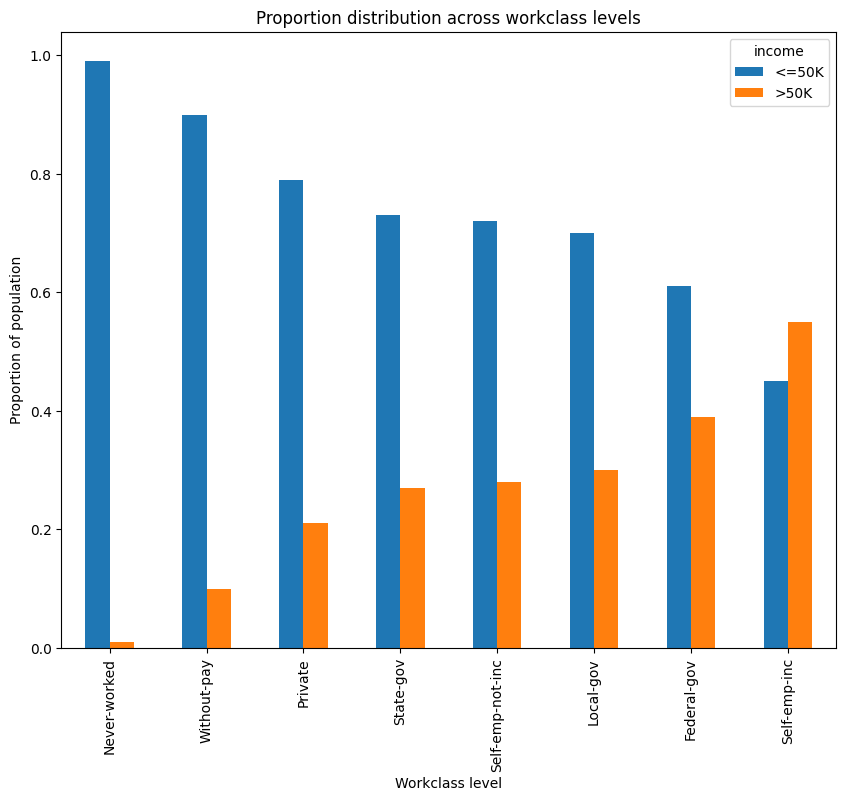

In [60]:
printmd('## 2.4. Workclass vs Income')

workclass = round(pd.crosstab(adult.workclass, adult.income).div(pd.crosstab(adult.workclass, adult.income).apply(sum,1),0),2)
workclass.sort_values(by = '>50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

## 2.5. Race vs Income

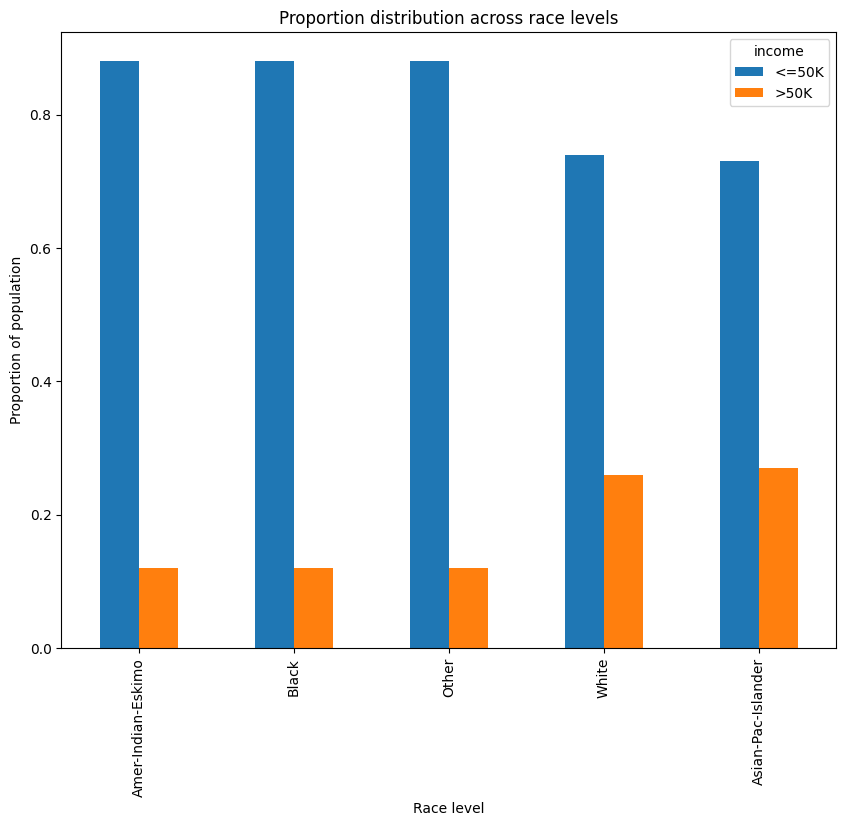

In [61]:
printmd('## 2.5. Race vs Income')

race = round(pd.crosstab(adult.race, adult.income).div(pd.crosstab(adult.race, adult.income).apply(sum,1),0),2)
race.sort_values(by = '>50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

print()

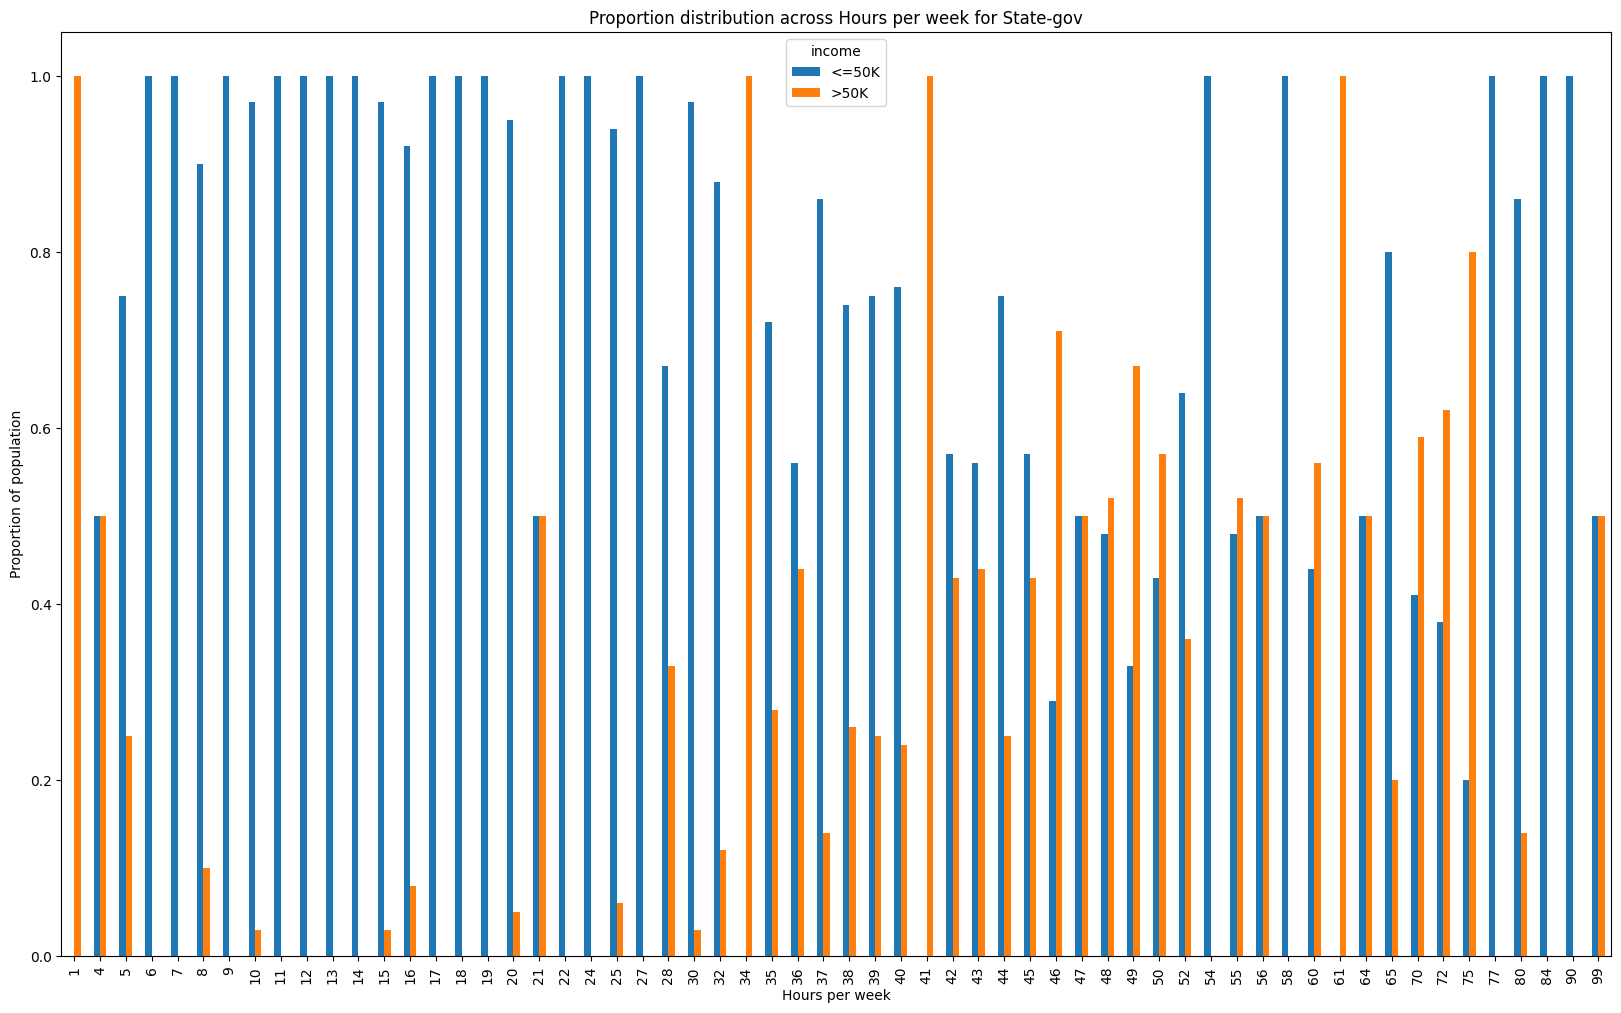

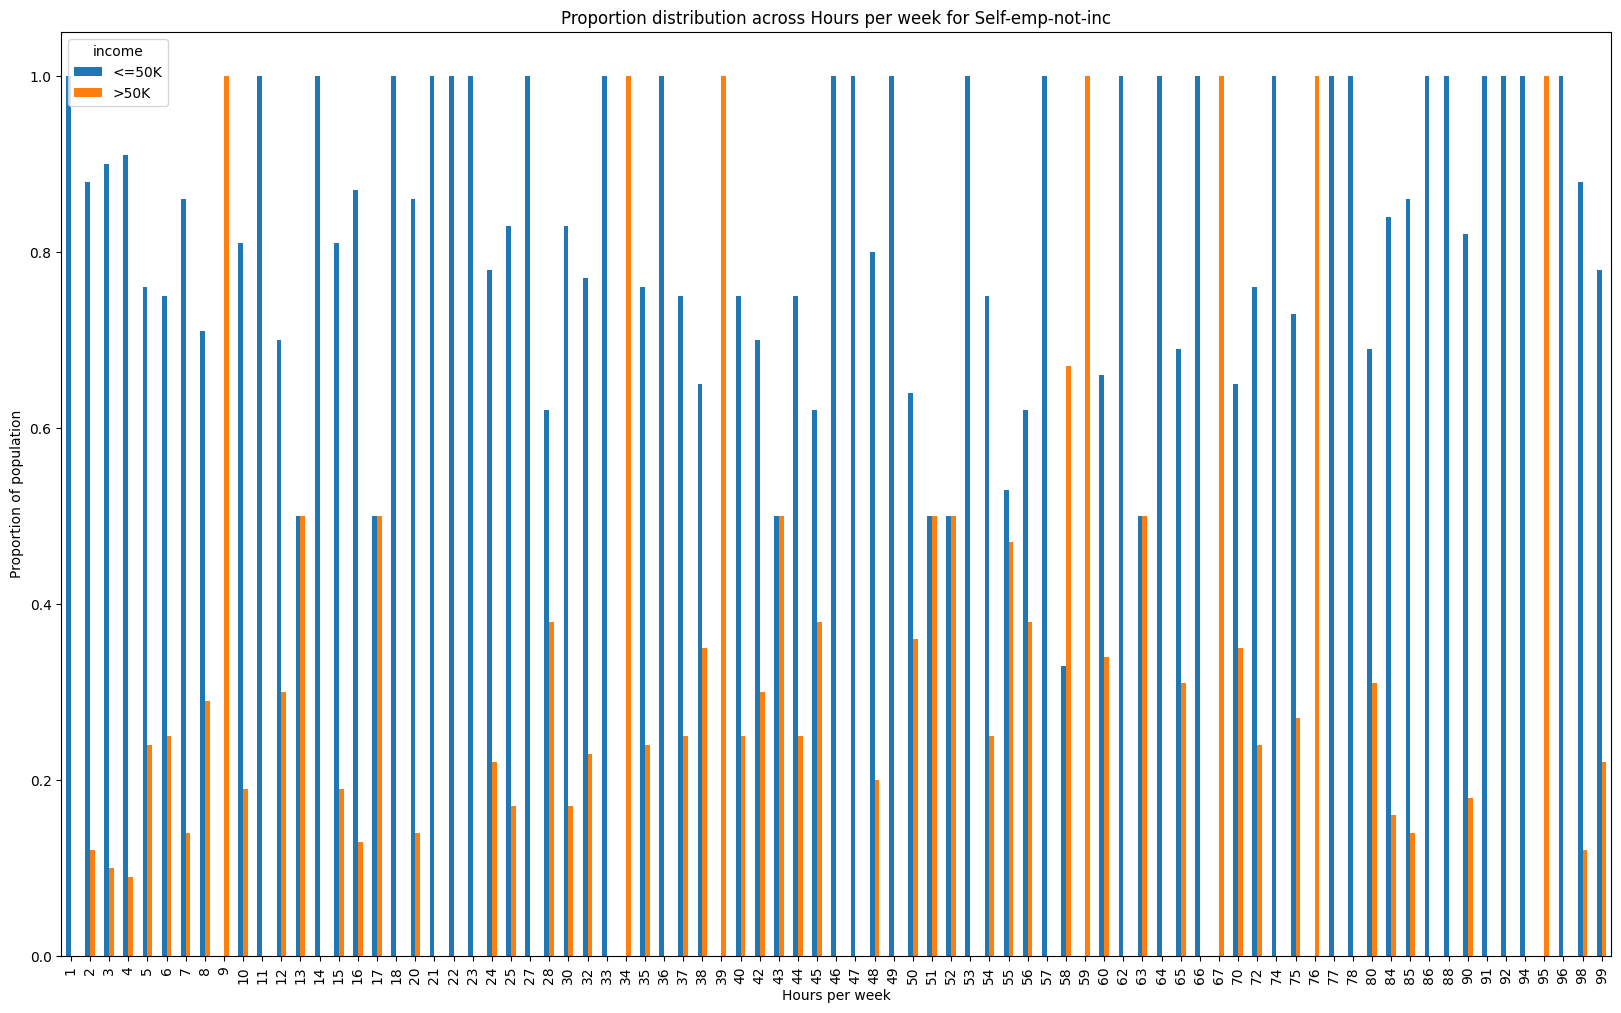

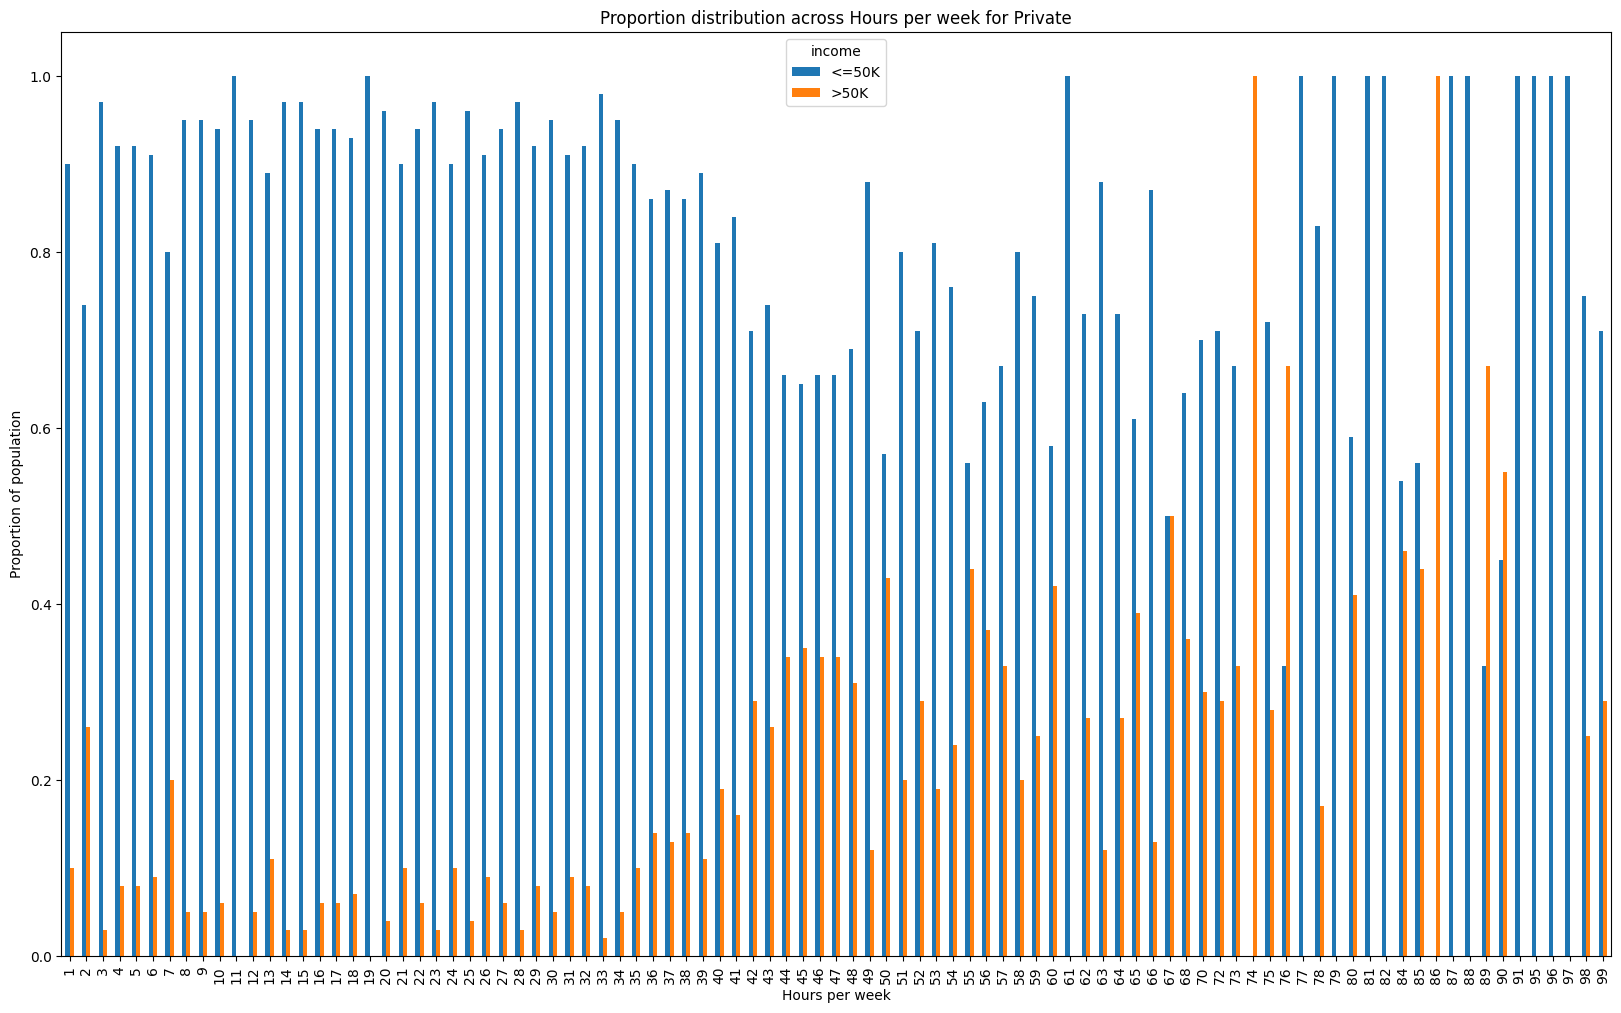

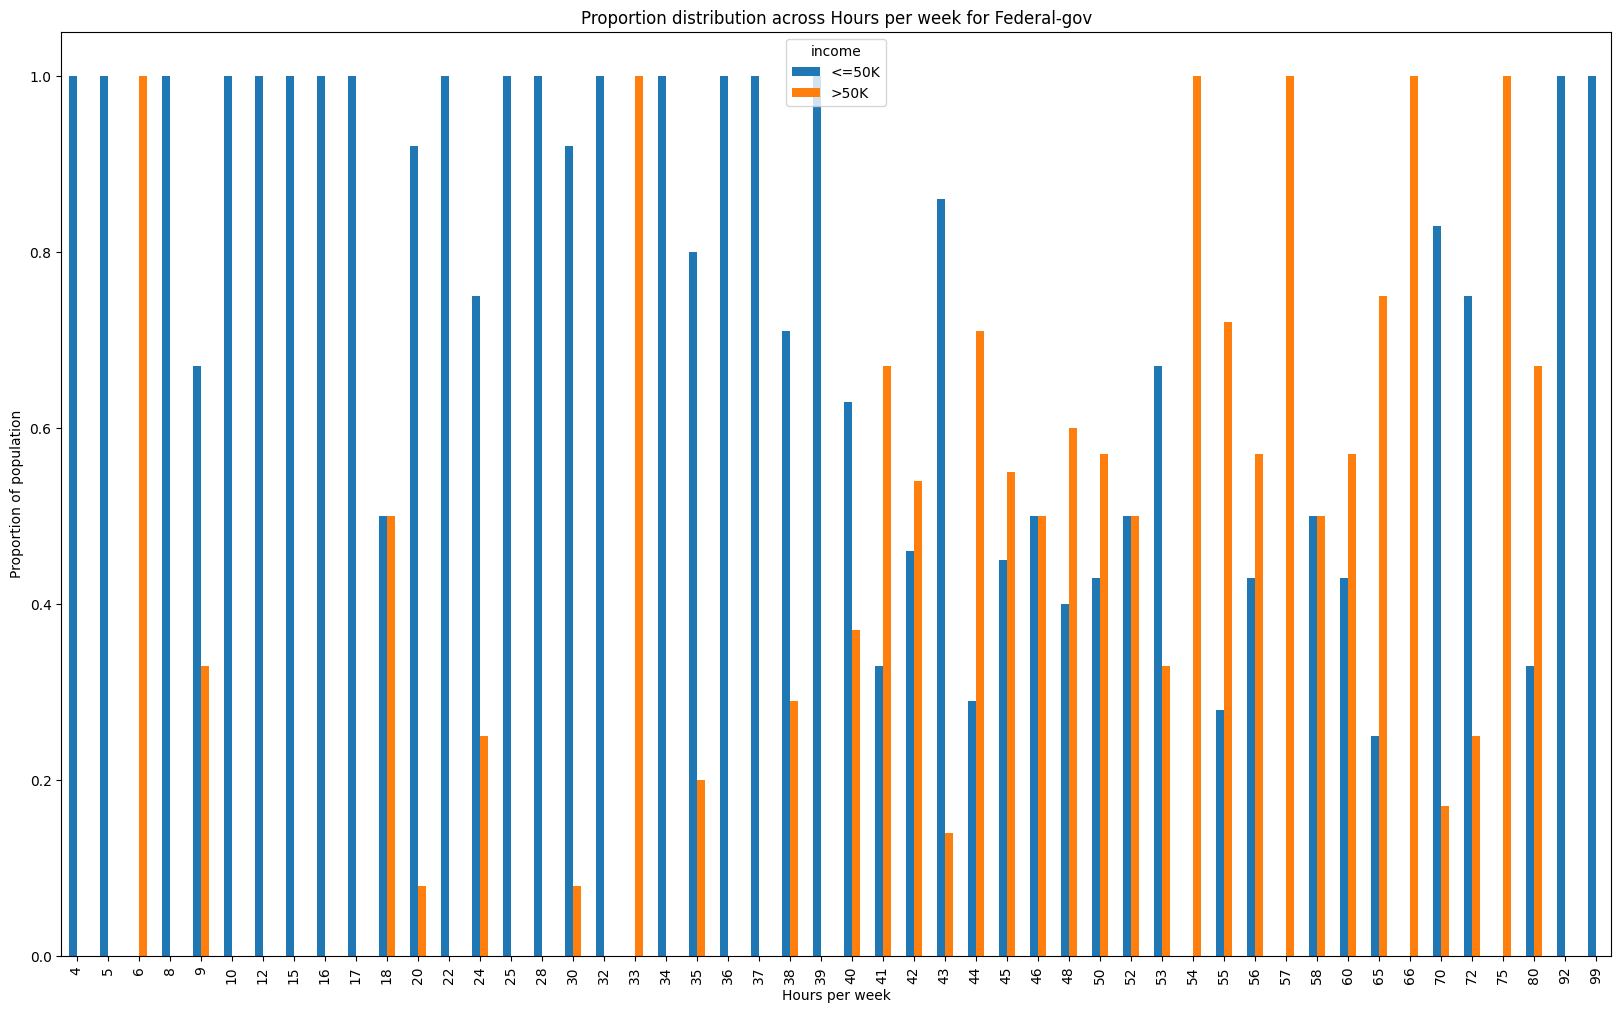

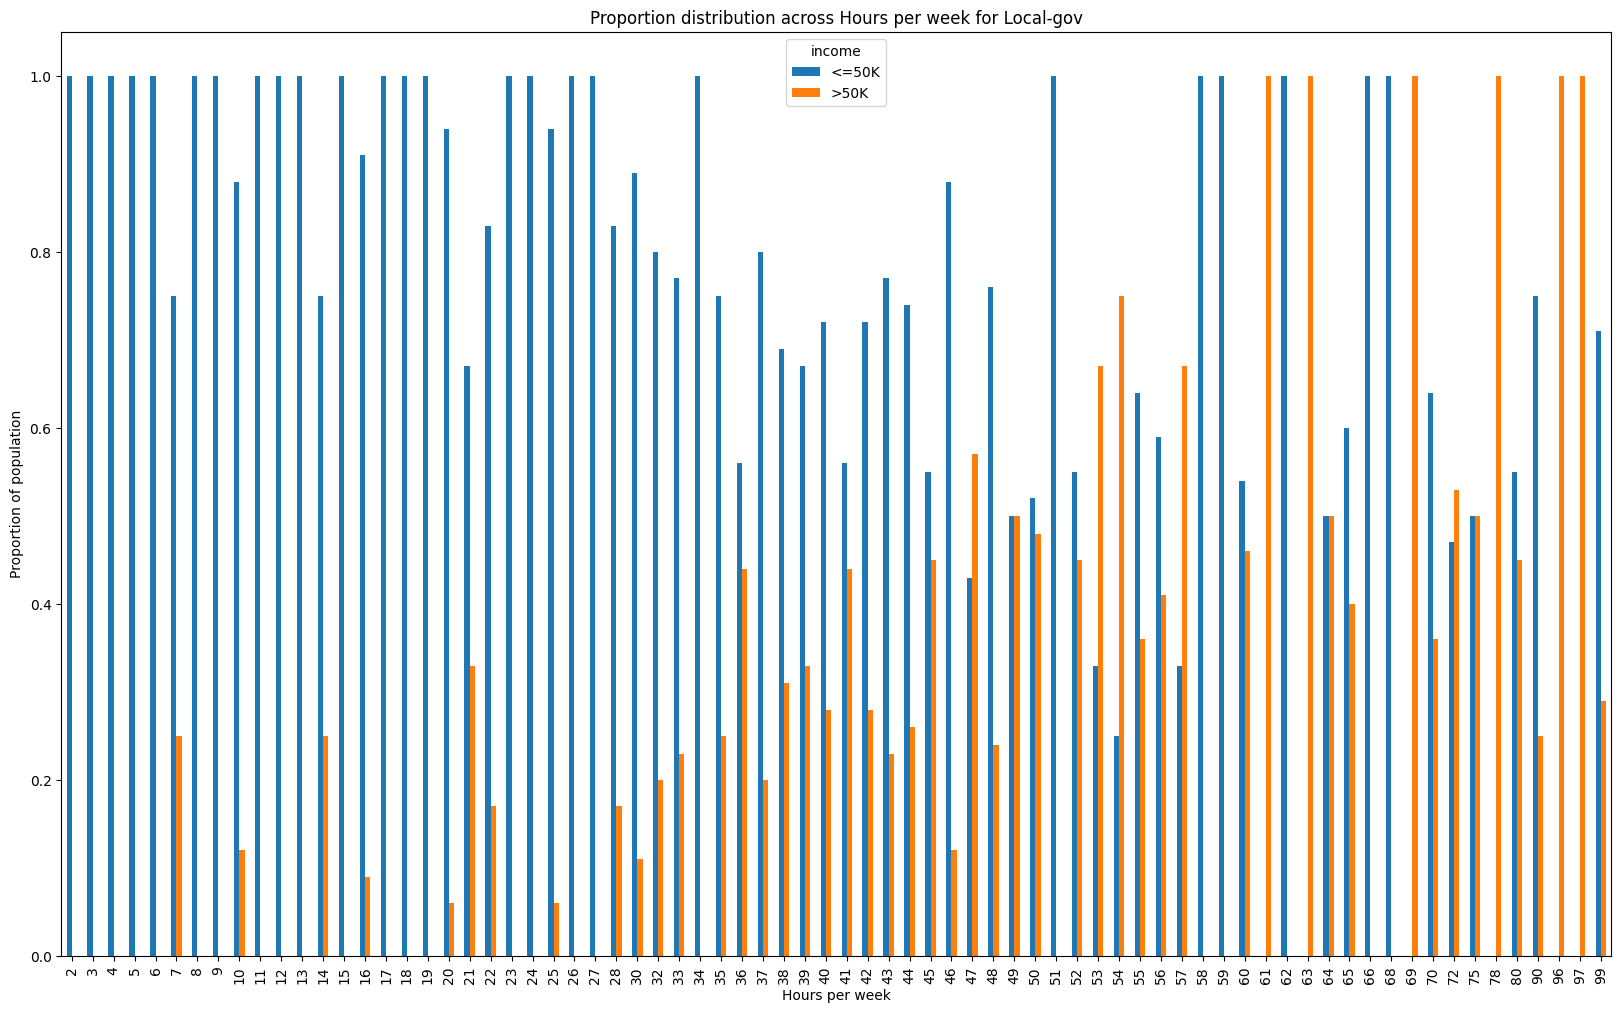

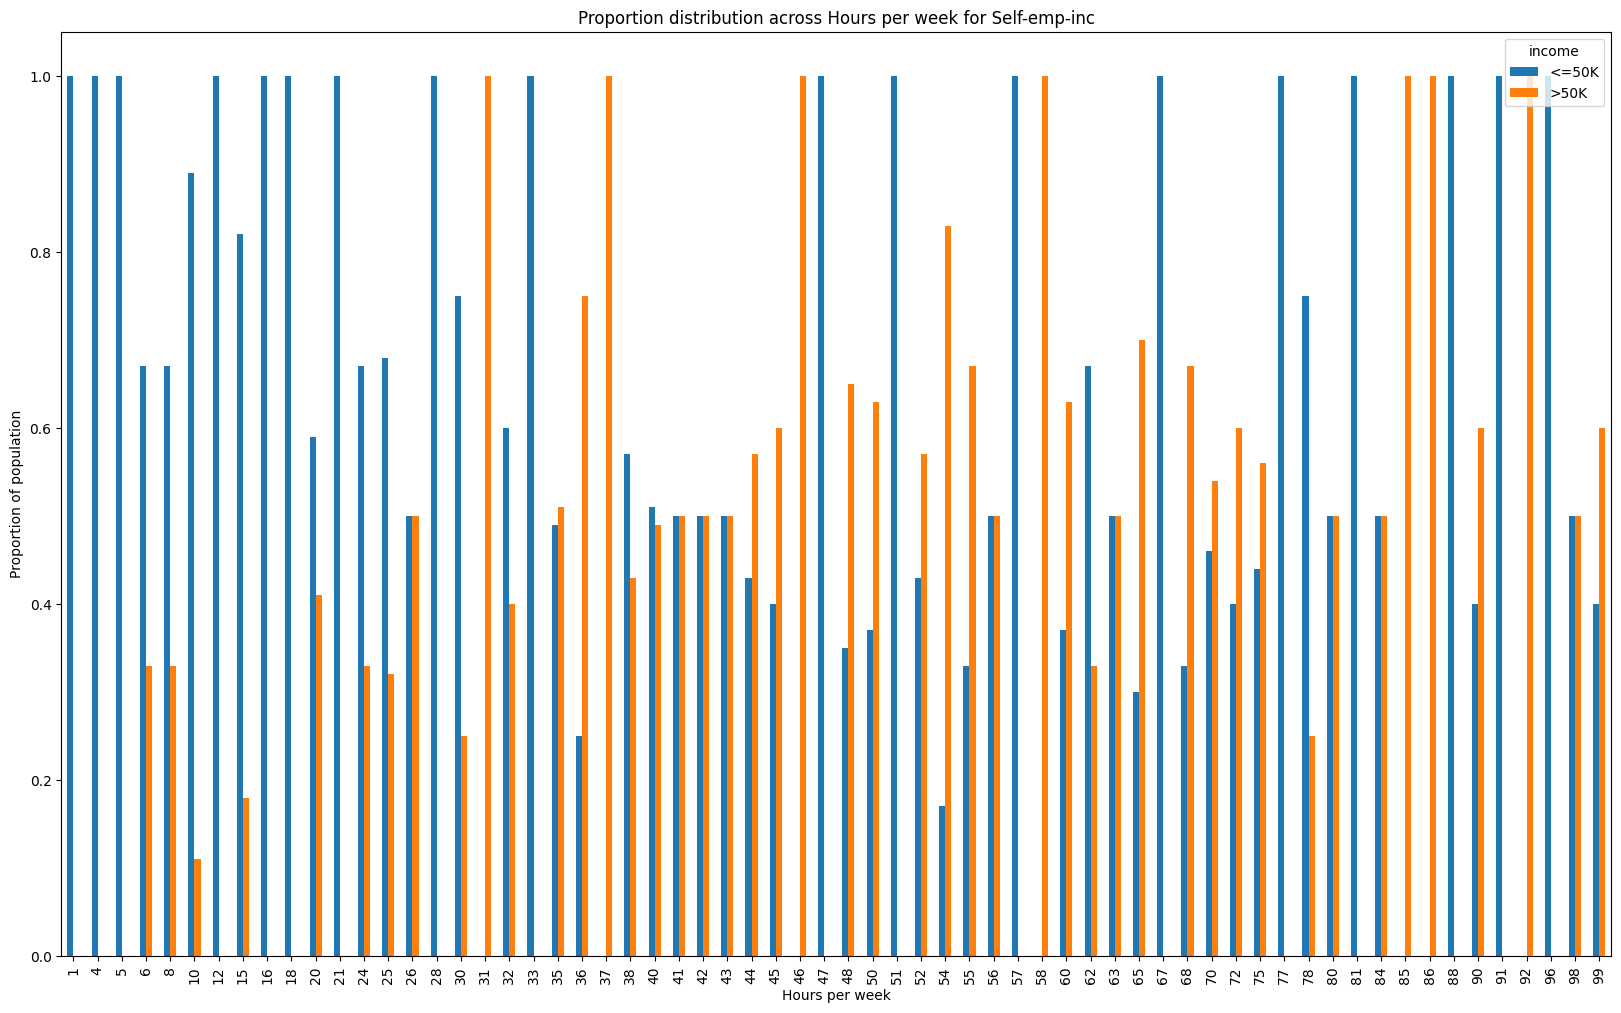

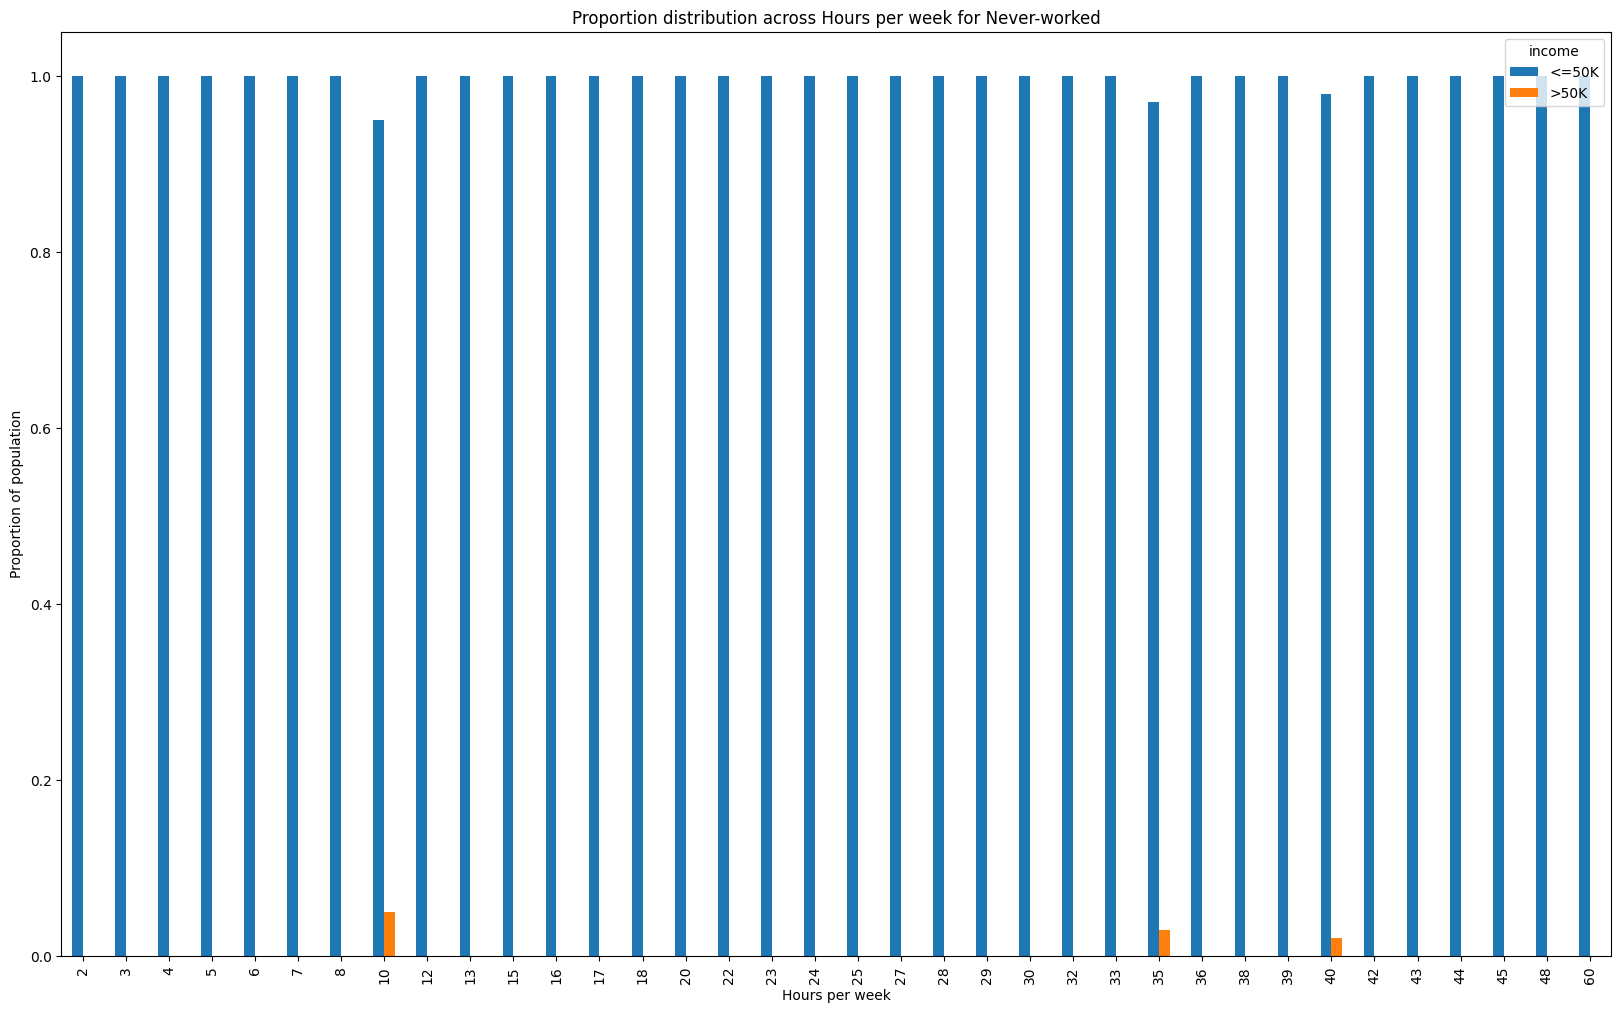

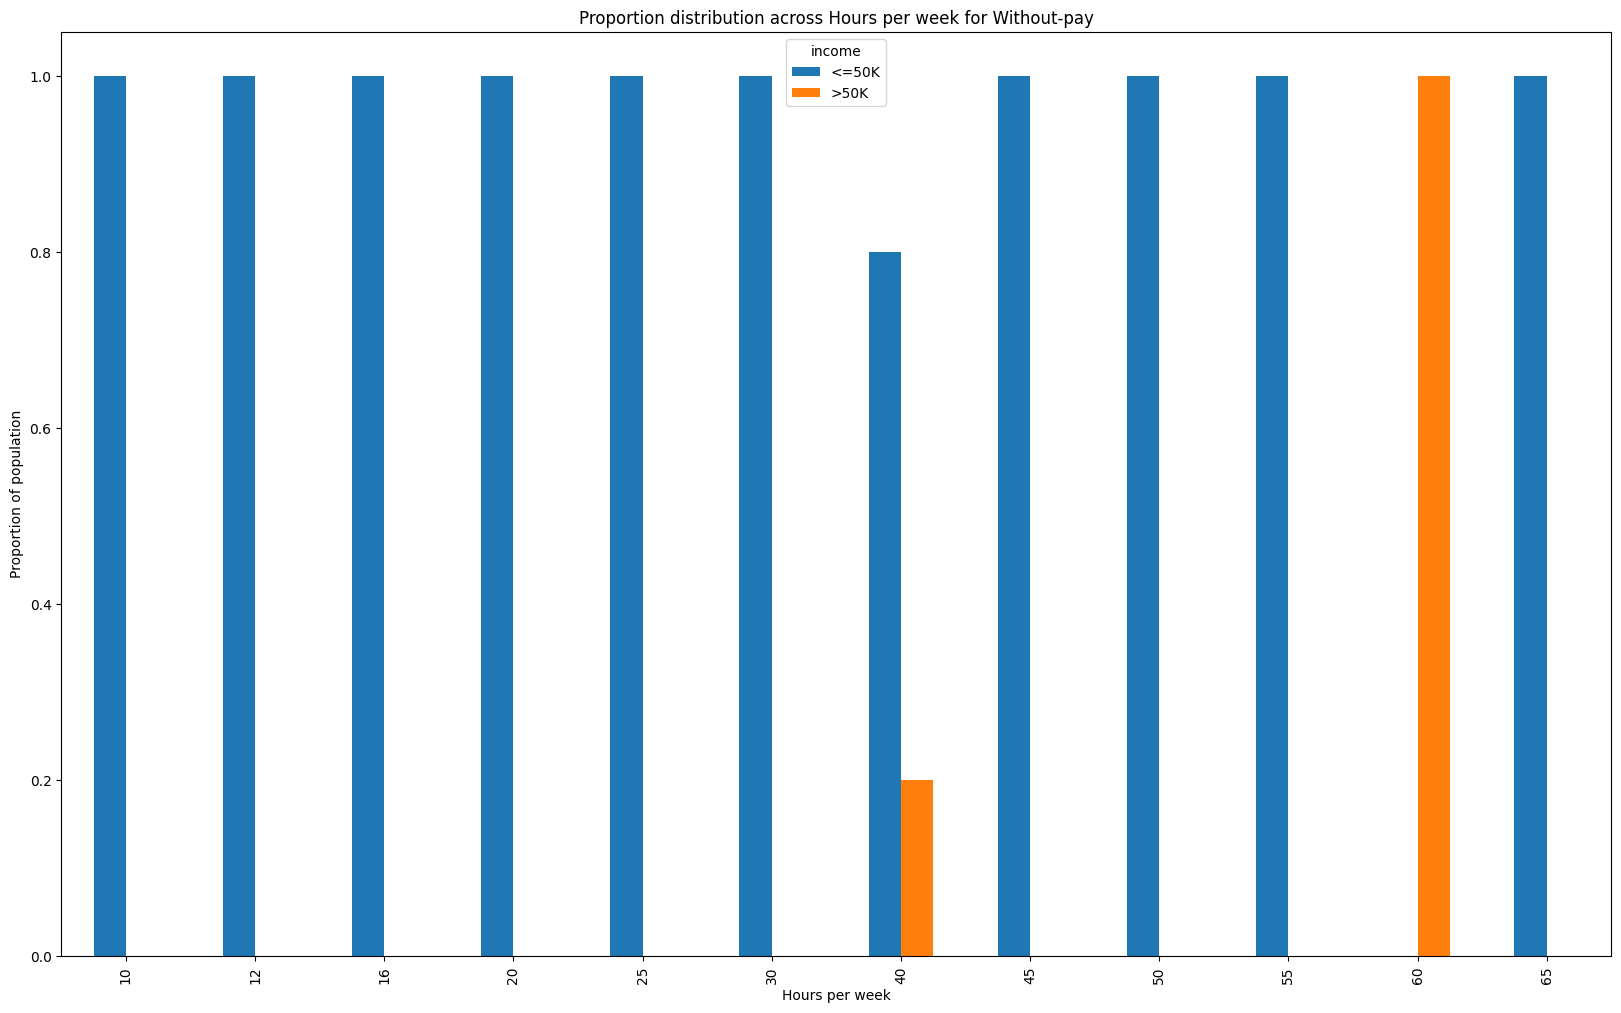

In [48]:
for i in adult.workclass.unique():
    df = adult[adult.workclass == i]

    hours_per_week = round(pd.crosstab(df['hours-per-week'], df.income).div(pd.crosstab(df['hours-per-week'], df.income).apply(sum,1),0),2)
    # hours_per_week.sort_values(by = '>50K', inplace = True)
    ax = hours_per_week.plot(kind ='bar', title = 'Proportion distribution across Hours per week for '+ i, figsize = (20,12))
    ax.set_xlabel('Hours per week')
    ax.set_ylabel('Proportion of population')

    print()

## Box plot

<Axes: >

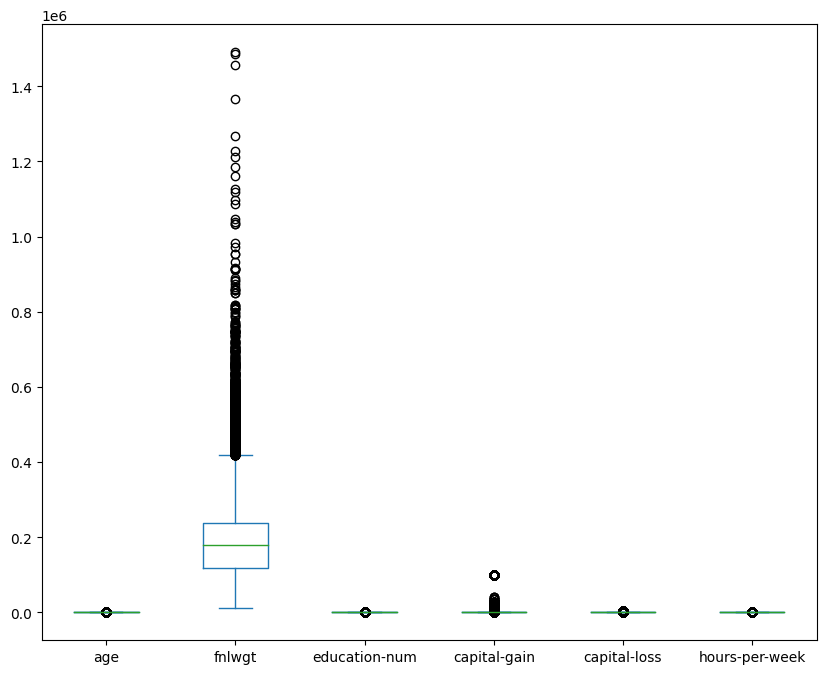

In [50]:
printmd('## Box plot')
adult.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

In [72]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [52]:
# Data Prep
adult_data = adult.drop(columns = ['income'])
adult_label = adult.income


adult_cat_1hot = pd.get_dummies(adult_data.select_dtypes('category'))
adult_non_cat = adult_data.select_dtypes(exclude = 'category')

adult_data_1hot = pd.concat([adult_non_cat, adult_cat_1hot], axis=1, join='inner')

In [53]:
# Train - Test split
train_data, test_data, train_label, test_label = train_test_split(adult_data_1hot, adult_label, test_size  = 0.25)

In [74]:
adult_data_1hot

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48837,39,215419,13,0,0,36,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,13,0,0,50,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,13,5455,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [75]:
adult_non_cat

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48836,33,245211,13,0,0,40
48837,39,215419,13,0,0,36
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [54]:
# Normalization
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data) 

In [55]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.loc['>50K','>50K']
    TN = confusion.loc['<=50K','<=50K']
    FP = confusion.loc['<=50K','>50K']
    FN = confusion.loc['>50K','<=50K']

    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate
    
    return out

In [80]:
train_data.shape

(35715, 105)

In [77]:
train_label

28813    <=50K
8134     <=50K
33783     >50K
29342    <=50K
5354     <=50K
         ...  
17348    <=50K
31579    <=50K
3436     <=50K
14001     >50K
4835     <=50K
Name: income, Length: 35715, dtype: category
Categories (4, object): ['<=50K', '<=50K.', '>50K', '>50K.']

In [56]:
#printmd('### 3.1.1. Model Development ')

# Gini 
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001, max_features = None)
clf_gini = clf_gini.fit(train_data, train_label)
clf_gini_pred = clf_gini.predict(test_data)
DTree_Gini = model_eval(test_label, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))


# Entropy
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(train_data, train_label)
clf_entropy_pred = clf_entropy.predict(test_data)
DTree_Entropy = model_eval(test_label, clf_entropy_pred)
print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))


#printmd('### 3.1.2. Model Evaulation ')
ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
display(ovl_dtree)

Desicion Tree using Gini Index : 85.26 percent.
Desicion Tree using Entropy : 85.24 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTree_Entropy,0.8524,0.7598,0.5794,0.6574,0.5794,0.9408,0.1476
DTree_Gini,0.8526,0.7605,0.5794,0.6577,0.5794,0.9410,0.1474


In [57]:
# Tan H
ann_tanh = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 2), random_state=1, warm_start=True)
ann_tanh.fit(train_data, train_label)                         
ann_tanh_pred = ann_tanh.predict(test_data)
ANN_TanH = model_eval(test_label, ann_tanh_pred)
print('ANN using TanH and lbfgs solver : %.2f percent.' % (round(ANN_TanH['accuracy']*100,2)))


# Relu
ann_relu = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-1, 
                    hidden_layer_sizes=(5, 2), random_state=1,
                    learning_rate  = 'invscaling',
                    warm_start = True)
ann_relu.fit(train_data, train_label)                         
ann_relu_pred = ann_relu.predict(test_data)
ANN_relu = model_eval(test_label, ann_relu_pred)
print('ANN using relu and adam solver : %.2f percent.' % (round(ANN_relu['accuracy']*100,2)))

# Log
ann_log = MLPClassifier(activation = 'logistic', solver='adam', 
                    alpha=1e-4, hidden_layer_sizes=(5, 2),
                    learning_rate  = 'invscaling', 
                    random_state=1, warm_start = True)
ann_log.fit(train_data, train_label)                         
ann_log_pred = ann_log.predict(test_data)
ANN_log = model_eval(test_label, ann_log_pred)
print('ANN using logistic and adam solver : %.2f percent.' % (round(ANN_log['accuracy']*100,2)))

# Identity
ann_identity = MLPClassifier(activation = 'identity', solver='adam', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=1, warm_start = True)
ann_identity.fit(train_data, train_label)                         
ann_identity_pred = ann_identity.predict(test_data)
ANN_identity = model_eval(test_label, ann_identity_pred)
print('ANN using identity and adam solver : %.2f percent.' % (round(ANN_identity['accuracy']*100,2)))

#printmd('### 3.2.2. Model Evaulation ')
ovl_ann = round(pd.DataFrame([ANN_TanH, ANN_relu, ANN_log, ANN_identity], index = ['ANN_TanH','ANN_relu', 'ANN_log', 'ANN_identity']),4)
display(ovl_ann)

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


ANN using TanH and lbfgs solver : 84.39 percent.
ANN using relu and adam solver : 85.10 percent.
ANN using logistic and adam solver : 84.85 percent.
ANN using identity and adam solver : 84.84 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
ANN_TanH,0.8439,0.7092,0.6127,0.6574,0.6127,0.9187,0.1561
ANN_relu,0.8510,0.7272,0.6247,0.6721,0.6247,0.9242,0.1490
ANN_log,0.8485,0.7184,0.6251,0.6685,0.6251,0.9207,0.1515
ANN_identity,0.8484,0.7229,0.6158,0.6651,0.6158,0.9236,0.1516


In [62]:
# rbf kernal
svm_clf_rbf = svm.SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(train_data, train_label)
svm_clf_rbf_pred = svm_clf_rbf.predict(test_data)
SVM_rbf = model_eval(test_label, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))

# Linear kernel
svm_clf_linear = svm.SVC(kernel = 'linear')
svm_clf_linear.fit(train_data, train_label)
svm_clf_linear_pred = svm_clf_linear.predict(test_data)
SVM_linear = model_eval(test_label, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))


# Poly kernal
svm_clf_poly = svm.SVC(kernel = 'poly')
svm_clf_poly.fit(train_data, train_label)
svm_clf_poly_pred = svm_clf_poly.predict(test_data)
SVM_poly = model_eval(test_label, svm_clf_poly_pred)
print('SVM using poly kernel : %.2f percent.' % (round(SVM_poly['accuracy']*100,2)))


svm_clf_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_clf_sigmoid.fit(train_data, train_label)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(test_data)
SVM_sigmoid = model_eval(test_label, svm_clf_sigmoid_pred)
print('SVM using sigmoid kernel : %.2f percent.' % (round(SVM_sigmoid['accuracy']*100,2)))



#printmd('### 3.3.2. Model Evaulation ')
ovl_svm = round(pd.DataFrame([SVM_rbf, SVM_linear, SVM_poly, SVM_sigmoid], index = ['SVM_rbf','SVM_linear', 'SVM_poly', 'SVM_sigmoid']),4)
display(ovl_svm)

SVM using rbf kernel : 84.49 percent.
SVM using linear kernel : 84.48 percent.
SVM using poly kernel : 83.05 percent.
SVM using sigmoid kernel : 80.96 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
SVM_rbf,0.8449,0.7284,0.5825,0.6473,0.5825,0.9297,0.1551
SVM_linear,0.8448,0.7285,0.5818,0.6469,0.5818,0.9299,0.1552
SVM_poly,0.8305,0.7102,0.5179,0.5990,0.5179,0.9316,0.1695
SVM_sigmoid,0.8096,0.6228,0.5605,0.5900,0.5605,0.8902,0.1904


In [63]:
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(train_data, train_label)
r_forest_gini_pred = r_forest_gini.predict(test_data)
rforest_gini = model_eval(test_label, r_forest_gini_pred)
print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(train_data, train_label)
r_forest_entropy_pred = r_forest_entropy.predict(test_data)
rforest_entropy = model_eval(test_label, r_forest_entropy_pred)
print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

#printmd('### 3.4.1.2. Model Evaulation ')
ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 85.28 percent.
Random Forest using Entropy : 85.18 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
rforest_gini,0.8528,0.7735,0.5622,0.6511,0.5622,0.9468,0.1472
rforest_entropy,0.8518,0.7680,0.5643,0.6506,0.5643,0.9449,0.1482


In [64]:
ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(train_data, train_label)
ada_pred = ada.predict(test_data)
adaboost = model_eval(test_label, ada_pred)
print('Adaboost : %.2f percent.' % (round(adaboost['accuracy']*100,2)))

#printmd('### 3.4.2.2. Model Evaulation ')
ovl_ada = round(pd.DataFrame([adaboost], index = ['adaboost']),4)
display(ovl_ada)

Adaboost : 86.39 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8639,0.7692,0.6333,0.6947,0.6333,0.9385,0.1361


In [65]:
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(train_data, train_label)
log_reg_pred = log_reg.predict(test_data)
logistic_reg = model_eval(test_label, log_reg_pred)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3)))

#printmd('### 3.5.2. Model Evaulation ')
ovl_logreg = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
display(ovl_logreg)

Logistic Regression : 84.89 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
logistic_reg,0.8489,0.7278,0.61,0.6637,0.61,0.9262,0.1511


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_outs = []
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data, train_label) 
    knn_pred = knn.predict(test_data)
    knn_perf = model_eval(test_label, knn_pred)
    knn_perf['k'] = i
    knn_outs.append(knn_perf)

ovl_knn = round(pd.DataFrame(knn_outs),4)
display(ovl_knn)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate,k
0,0.7892,0.5686,0.5694,0.5690,0.5694,0.8603,0.2108,1
1,0.8127,0.6262,0.5797,0.6021,0.5797,0.8881,0.1873,3
2,0.8216,0.6520,0.5794,0.6135,0.5794,0.9000,0.1784,5
3,0.8272,0.6688,0.5808,0.6217,0.5808,0.9070,0.1728,7
4,0.8258,0.6690,0.5687,0.6148,0.5687,0.9090,0.1742,9
5,0.8266,0.6700,0.5729,0.6176,0.5729,0.9087,0.1734,11
6,0.8276,0.6737,0.5718,0.6186,0.5718,0.9104,0.1724,13
7,0.8307,0.6814,0.5770,0.6249,0.5770,0.9127,0.1693,15
8,0.8288,0.6775,0.5718,0.6202,0.5718,0.9120,0.1712,17
9,0.8278,0.6752,0.5694,0.6178,0.5694,0.9114,0.1722,19


In [67]:
overall_eval = pd.concat([ovl_dtree, ovl_ann, ovl_svm, ovl_rf, ovl_ada, ovl_logreg], axis = 0)
overall_eval.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)

printmd('Combing the performance statistics of all the model developed, as seen in table below, \
        we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7812) \
        and accuracy (0.8647). The Artificial neural network models are only marginally being in terms of \
        accuracy and F-measure. Almost all the model have an accuracy greater than 0.84, expect for two SVM \
        models. The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and \
        specificity of all the models developed.')

display(overall_eval)

Combing the performance statistics of all the model developed, as seen in table below,         we see that the ensemble model Adaboost hast the highest F-measure (0.6833), precision (0.7812)         and accuracy (0.8647). The Artificial neural network models are only marginally being in terms of         accuracy and F-measure. Almost all the model have an accuracy greater than 0.84, expect for two SVM         models. The table below lists the accuracy, error rate, F-measure, precision, recall, sensitivity and         specificity of all the models developed.

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8639,0.7692,0.6333,0.6947,0.6333,0.9385,0.1361
ANN_relu,0.8510,0.7272,0.6247,0.6721,0.6247,0.9242,0.1490
ANN_log,0.8485,0.7184,0.6251,0.6685,0.6251,0.9207,0.1515
ANN_identity,0.8484,0.7229,0.6158,0.6651,0.6158,0.9236,0.1516
logistic_reg,0.8489,0.7278,0.6100,0.6637,0.6100,0.9262,0.1511
DTree_Gini,0.8526,0.7605,0.5794,0.6577,0.5794,0.9410,0.1474
DTree_Entropy,0.8524,0.7598,0.5794,0.6574,0.5794,0.9408,0.1476
ANN_TanH,0.8439,0.7092,0.6127,0.6574,0.6127,0.9187,0.1561
rforest_gini,0.8528,0.7735,0.5622,0.6511,0.5622,0.9468,0.1472
rforest_entropy,0.8518,0.7680,0.5643,0.6506,0.5643,0.9449,0.1482


In [68]:
def generateRoc(test_data, test_label, classifiers, pred_labels, plot_labels, limiter):
    
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    y_test = label_binarize(test_label, classes=['<=50K', '>50K'])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index('>50K')
        
        fpr, tpr, thres = metrics.roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
                               
        lw = 2
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=lw, label=plot_labels[i])
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [71]:
%matplotlib notebook
classifier_list = [clf_gini
                ,clf_entropy
                ,ann_tanh
                ,ann_relu
                ,ann_log
                ,ann_identity
#                 ,svm_clf_rbf
#                 ,svm_clf_linear
#                 ,svm_clf_poly
#                 ,svm_clf_sigmoid
                ,r_forest_gini
                ,r_forest_entropy
                ,ada
                ,log_reg
                ] 
pred_list = [clf_gini_pred
            ,clf_entropy_pred
            ,ann_tanh_pred
            ,ann_relu_pred
            ,ann_log_pred
            ,ann_identity_pred
#             ,svm_clf_rbf_pred
#             ,svm_clf_linear_pred
#             ,svm_clf_poly_pred
#             ,svm_clf_sigmoid_pred
            ,r_forest_gini_pred
            ,r_forest_entropy_pred
            ,ada_pred
            ,log_reg_pred
            ]

clf_labels = ['DTree Gini'
            ,'DTree Entropy'
            ,'ANN TanH'
            ,'ANN relu'
            ,'ANN Logistic'
            ,'ANN Identity'
#             ,svm_clf_rbf_pred
#             ,svm_clf_linear_pred
#             ,svm_clf_poly_pred
#             ,svm_clf_sigmoid_pred
            ,'RForest Gini'
            ,'RForest Entropy'
            ,'Adaboost'
            ,'Logistic Regression'
            ]

limiter = ['Adaboost', 'ANN TanH', 'ANN relu', 'ANN Logistic', 'Logistic Regression']
generateRoc(test_data, test_label, classifier_list, pred_list, clf_labels, limiter)

<IPython.core.display.Javascript object>